In [5]:
# importing necessary modules
# installing connector for mysql and python

! pip install mysql-connector-python

In [6]:
import mysql.connector
from mysql.connector import Error
import pandas as pd

In [8]:
database = mysql.connector.connect(host ='localhost',user = 'root',passwd = '9878781367@Mi',database = 'manish')

In [11]:
cur = database.cursor()

In [12]:
#cur.execute('select * from manish.walmart')

In [13]:
# pandas dataframe 
data = pd.read_sql('select * from walmart',database)

C:\Users\ABCD\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [14]:
data.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,2010-03-12,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,2010-03-19,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,2010-03-26,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,2010-04-02,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,2010-04-09,1545418.53,0,65.86,2.770,210.622857,7.808


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
query = "select date_format(Date,'%Y-%m') as md ,round(sum(Weekly_Sales)) as sales from walmart group by md order by md"

data1 = pd.read_sql(query,database)

C:\Users\ABCD\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [17]:
data1.head(10)

,md,sales
0,2010-02,187202149.0
1,2010-03,178819781.0
2,2010-04,227432083.0
3,2010-05,183591575.0
4,2010-06,189006495.0
5,2010-07,228837747.0
6,2010-08,184741019.0
7,2010-09,174361075.0
8,2010-10,213547012.0
9,2010-11,199417219.0


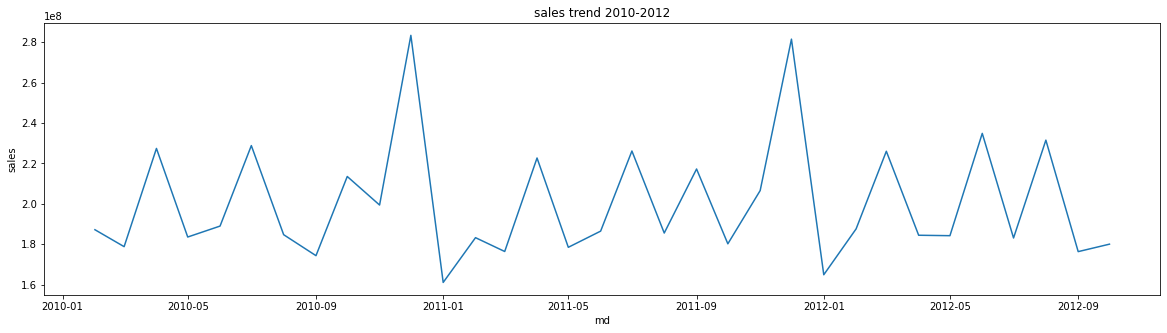

In [18]:
data1['md'] = pd.to_datetime(data1['md'])
plt.figure(figsize = (20,5))
sns.lineplot(x = 'md', y = 'sales',data = data1)
plt.title('sales trend 2010-2012')
#plt.xticks(data1['md'])
plt.show()

In [19]:
query1 = "select date_format(Date,'%Y-%m') as md,round(avg(Fuel_Price),1) fp,round(avg(CPI),1) cpi,round(avg(Unemployment),1) un from walmart group by md order by md"

data2 = pd.read_sql(query1,database)

C:\Users\ABCD\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


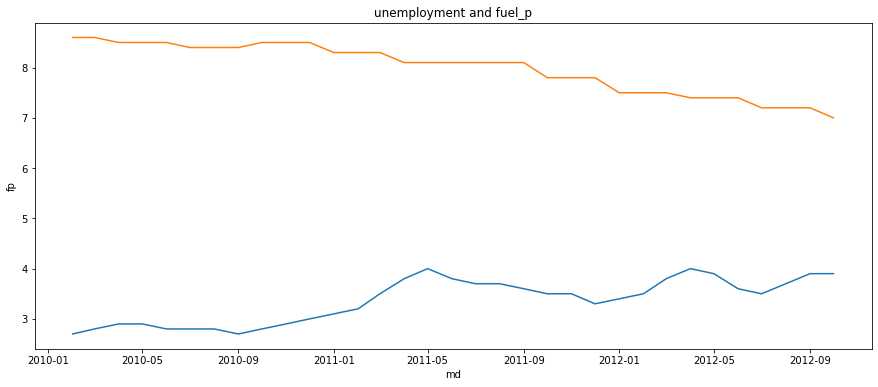

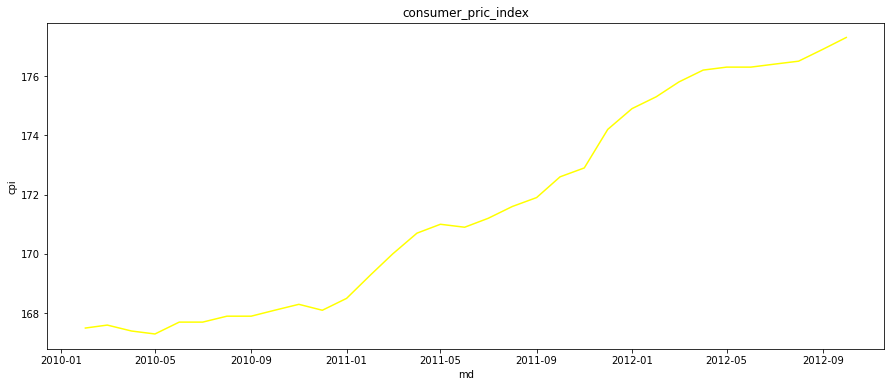

In [20]:
#plotting relation between fuel_p,consumer price index and unemployment
data2['md'] = pd.to_datetime(data2['md'])
plt.figure(figsize = (15,6))
plt.title('unemployment and fuel_p')
sns.lineplot(data = data2,x = "md",y = "fp",marker = None)

sns.lineplot(x = 'md',y = 'un',data = data2)
#plt.legend()
plt.show()
plt.figure(figsize = (15,6))
plt.title('consumer_pric_index')
sns.lineplot(x = 'md',y = 'cpi',data = data2,color = 'yellow')
plt.show()

In [52]:
query2 ="select monthname(Date) 'month',round(sum(Weekly_Sales)/10000000,1) 'sales_in_cr' from walmart where year(Date) = 2010 group by monthname(Date) order by sales_in_cr desc"
data3= pd.read_sql(query2,database)

query3 ="select monthname(Date) 'month',round(sum(Weekly_Sales)/10000000,1) 'sales_in_cr' from walmart where year(Date) = 2011 group by monthname(Date) order by sales_in_cr desc"
data4= pd.read_sql(query3,database)

query4 ="select monthname(Date) 'month',round(sum(Weekly_Sales)/10000000,1) 'sales_in_cr' from walmart where year(Date) = 2012 group by monthname(Date) order by sales_in_cr desc"
data5= pd.read_sql(query4,database)


C:\Users\ABCD\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\Users\ABCD\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\Users\ABCD\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


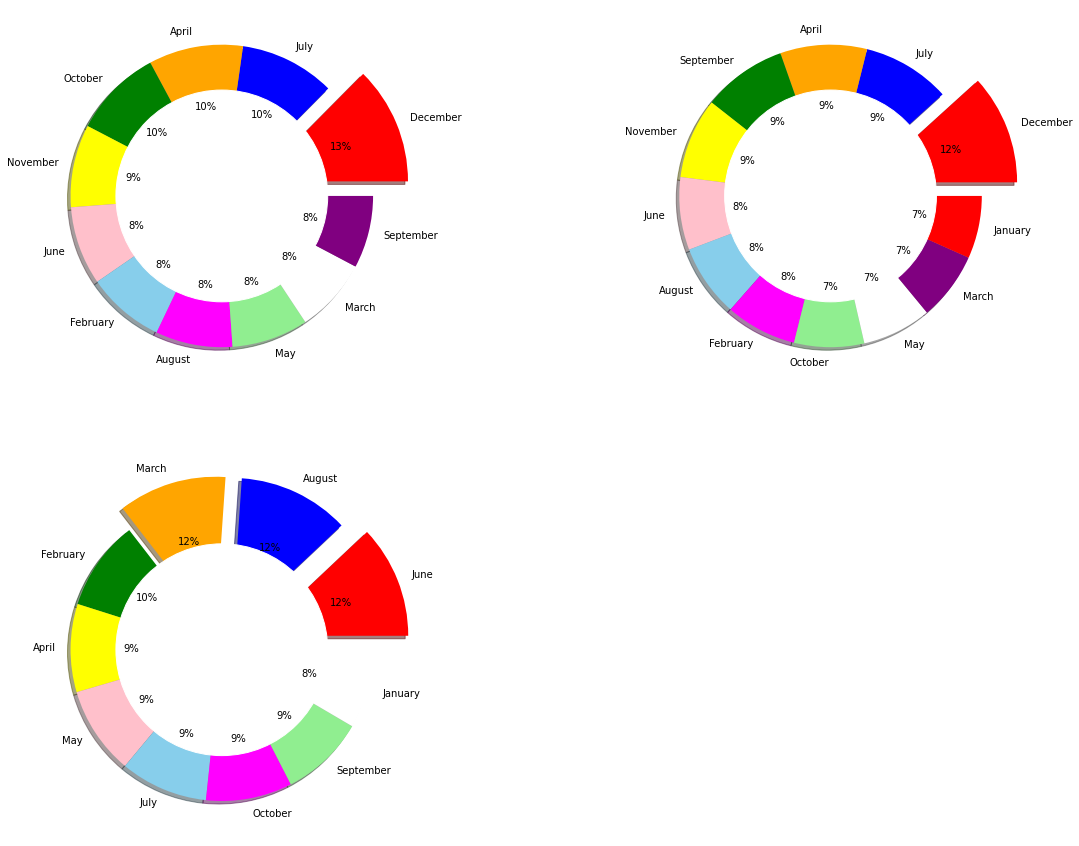

In [91]:
plt.figure(figsize =(20,32))
plt.subplot(4,2,1)
plt.pie(data3['sales_in_cr'],labels = data3['month'],autopct = '%.0f%%',explode = [0.25,0,0,0,0,0,0,0,0,0,0],colors = ['red','blue','orange','green','yellow','pink','skyblue','magenta','lightgreen','white','purple'],shadow = True)
circle = plt.Circle( (0,0), 0.7, color='white')
plt.gcf().gca().add_artist(circle)
#plt.show()
plt.subplot(4,2,2)
plt.pie(data4['sales_in_cr'],labels = data4['month'],autopct = '%.0f%%',explode = [0.25,0,0,0,0,0,0,0,0,0,0,0],colors = ['red','blue','orange','green','yellow','pink','skyblue','magenta','lightgreen','white','purple'],shadow = True)
circle = plt.Circle( (0,0), 0.7, color='white')
plt.gcf().gca().add_artist(circle)
#plt.show()
plt.subplot(4,2,3)
plt.pie(data5['sales_in_cr'],labels = data5['month'],autopct = '%.0f%%',explode = [0.25,0.15,0.15,0,0,0,0,0,0,0],colors = ['red','blue','orange','green','yellow','pink','skyblue','magenta','lightgreen','white','purple'],shadow = True)
circle = plt.Circle( (0,0), 0.7, color='white')
plt.gcf().gca().add_artist(circle)

plt.show()

In [99]:
query5 = 'select temperature,cpi from walmart where year(Date) = 2010'
data6 = pd.read_sql(query5,database)

C:\Users\ABCD\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


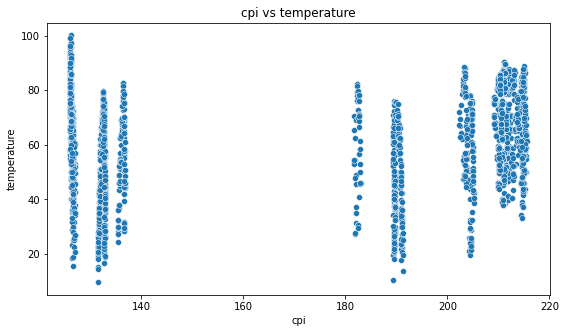

In [101]:
plt.figure(figsize = (9,5))
sns.scatterplot(x = 'cpi',y = 'temperature', data = data6 )
plt.title('cpi vs temperature')
plt.show()

In [103]:
query6 = 'select fuel_price,cpi from walmart where year(Date) = 2010'
data7 = pd.read_sql(query5,database)

C:\Users\ABCD\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


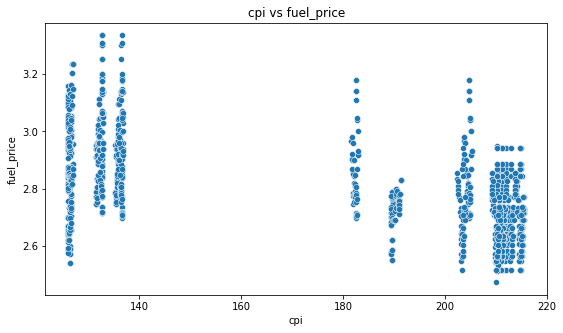

In [105]:
plt.figure(figsize = (9,5))
sns.scatterplot(x = 'cpi',y = 'fuel_price', data = data7 )
plt.title('cpi vs fuel_price')
plt.show()

In [121]:
query7 = "select date_format(Date,'%Y-%m') md,sum(weekly_Sales) sales ,holiday_flag from walmart group by md,holiday_flag"
data8 = pd.read_sql(query7,database)
data8['md'] = pd.to_datetime(data8['md'])

C:\Users\ABCD\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


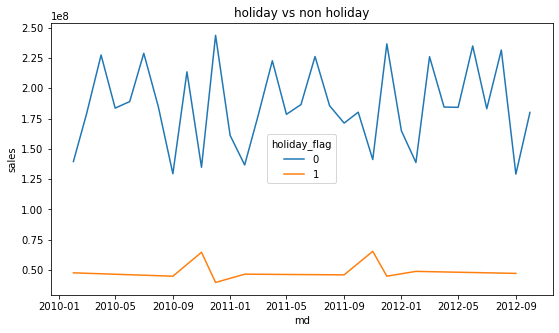

In [122]:
plt.figure(figsize = (9,5))
sns.lineplot(x = 'md',y = 'sales',hue = 'holiday_flag' , data = data8)
plt.title('holiday vs non holiday')
plt.show()

In [123]:
query8 = "select * from (select * ,round(sum(i_s) over(partition by md),1) t_s from (select date_format(Date,'%Y-%m') md,holiday_flag,round(sum(weekly_Sales/10000000),1) i_s from walmart group by md,holiday_flag) x) y where holiday_flag = 1 and md = 2010"
data9 = pd.read_sql(query8,database)

C:\Users\ABCD\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [162]:
query9 = "select * from (select * ,round(sum(i_s) over(partition by md),1) t_s from (select date_format(Date,'%Y-%m') md,holiday_flag,round(sum(weekly_Sales/10000000),1) i_s from walmart group by md,holiday_flag) x) y where holiday_flag = 1 and md = 2011"
data10 = pd.read_sql(query9,database)

C:\Users\ABCD\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


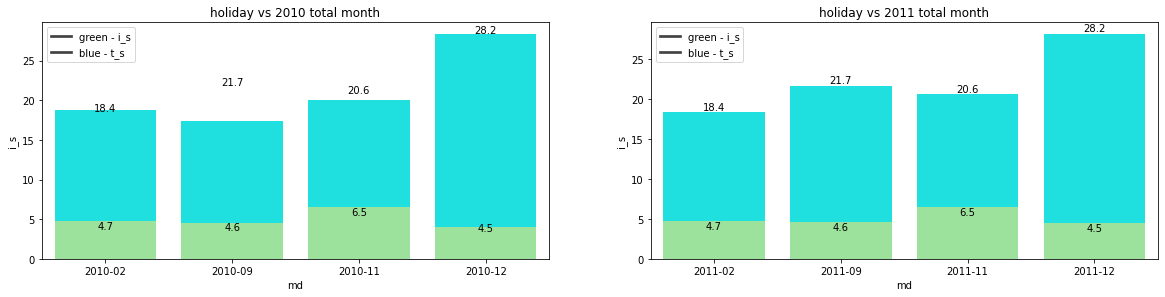

In [176]:
plt.figure(figsize = (20,20))

plt.subplot(4,2,1)

sns.barplot(x = 'md',y = 't_s',data = data9,color = 'aqua')
for i in range (len(data10)):
    plt.text(i,data10['t_s'][i],data10['t_s'][i],ha = 'center',va = 'bottom')
plt.title('holiday vs 2011 total month')
sns.barplot(x = 'md',y = 'i_s',data = data9,color = 'lightgreen')
for i in range (len(data10)):
    plt.text(i,data10['i_s'][i],data10['i_s'][i],ha = 'center',va = 'top')
plt.title('holiday vs 2010 total month')
plt.legend(['green - i_s','blue - t_s'])

# second 

plt.subplot(4,2,2)

sns.barplot(x = 'md',y = 't_s',data = data10,color = 'aqua')
for i in range (len(data10)):
    plt.text(i,data10['t_s'][i],data10['t_s'][i],ha = 'center',va = 'bottom')
plt.title('holiday vs 2011 total month')
sns.barplot(x = 'md',y = 'i_s',data = data10,color = 'lightgreen')
for i in range (len(data10)):
    plt.text(i,data10['i_s'][i],data10['i_s'][i],ha = 'center',va = 'top')
plt.title('holiday vs 2011 total month')
plt.legend(['green - i_s','blue - t_s'])
plt.show()